# 02 Exploratory Data Analysis

## 2.1 Imports

In [1]:
#Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Importing stock price YTD
stock_data = pd.read_csv('/Users/user/Documents/Springboard_Data_Science/Capstone_2_Twitter_Sentiment_Analysis/Data/stock_data.csv', encoding='latin-1')
stock_data = stock_data.drop(['Close'], axis=1)
stock_data.head()

,Dates,Time,Open,High,Low,Adj Close,Volume
0,2022-10-03,00:00:00,138.210007,143.070007,137.690002,142.214081,114311700
1,2022-10-04,00:00:00,145.029999,146.220001,144.259995,145.858047,87830100
2,2022-10-05,00:00:00,144.070007,147.380005,143.009995,146.157532,79471000
3,2022-10-06,00:00:00,145.809998,147.539993,145.220001,145.189148,68402200
4,2022-10-07,00:00:00,142.539993,143.100006,139.449997,139.857986,85925600


## 2.2 EDA on Stock Data

In [3]:
#Before we dive into further manipulation, let's look at the statistics in stock_data & the heat map
#because it can get really messy later on when we add in more columns
stock_data.describe()

,Open,High,Low,Adj Close,Volume
count,20.000000,20.000000,20.000000,20.000000,2.000000e+01
mean,143.653001,146.428501,142.008500,144.357530,8.850982e+07
std,4.107105,4.280018,4.014353,4.611861,2.341888e+07
min,134.990005,140.360001,134.369995,138.110886,6.175830e+07
25%,140.907505,143.092506,138.482506,141.677483,7.485732e+07
50%,143.545006,146.055000,142.074997,143.566841,8.558825e+07
75%,146.154999,148.150005,144.499996,146.374676,9.123265e+07
max,150.960007,157.500000,149.360001,155.482086,1.647624e+08


Heatmap – A heatmap is a 2d representation of data that tells how much a variable is correlated to other variables. It contains values from -1 to 1. Suppose two variables x and y. Let us see the possible causes.

When the correlation between x and y is -1, that means x has a negative correlation with y. It simply means when the value of x increases, the value of y would decrease. The more the value is close to -1, the more will be the negative correlation. 

When the correlation between x and y is 0. It means that x and y have no correlation and are independent.

When the correlation between x and y is 1, that means x has a positive correlation with y. Or simply, we can say whenever x increases, y increases too.

<AxesSubplot:>

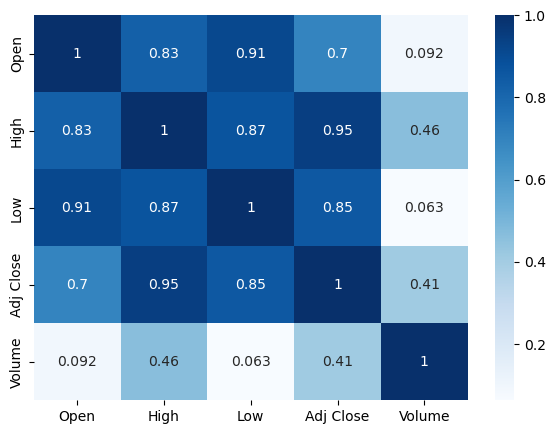

In [4]:
plt.figure(figsize=(7,5))
sns.heatmap(stock_data.corr(),cmap='Blues',annot=True)

From the above heatmap, you can see a large number of 1s and values close to 1. This means those variables show high positive correlations and are interrelated. This might be possible because of the comparatively very small difference between those values. However, in-stock market this small value is what makes the difference. So, what we are going to do, is add new variables to our dataset that represents the difference between those values

### 2.2.1 Stock Price Data Manipulation

In the following cells, we will examine the change in price between a given date and its next day's pricing (one period into the future) using the function .shift(). For example, "shifted_Open" implicates the next day's opening price for current date. From there, we will be able to find the percentage change of AAPL opening price.

In [5]:
#Creating duplicate 
eda_stock_data = stock_data.copy()

#Shifting Opening price
eda_stock_data['shifted_Open'] = eda_stock_data.Open.shift()

#Shifting High price
eda_stock_data['shifted_High'] = eda_stock_data.High.shift()

#Shifting Low price
eda_stock_data['shifted_Low'] = eda_stock_data.Low.shift()

#Shifting Adjusted closing price
eda_stock_data['shifted_Close'] = eda_stock_data['Adj Close'].shift()

#Shifting Volume
eda_stock_data['shifted_Volume'] = eda_stock_data.Volume.shift()

eda_stock_data.head()

,Dates,Time,Open,High,Low,Adj Close,Volume,shifted_Open,shifted_High,shifted_Low,shifted_Close,shifted_Volume
0,2022-10-03,00:00:00,138.210007,143.070007,137.690002,142.214081,114311700,NaN,NaN,NaN,NaN,NaN
1,2022-10-04,00:00:00,145.029999,146.220001,144.259995,145.858047,87830100,138.210007,143.070007,137.690002,142.214081,114311700.0
2,2022-10-05,00:00:00,144.070007,147.380005,143.009995,146.157532,79471000,145.029999,146.220001,144.259995,145.858047,87830100.0
3,2022-10-06,00:00:00,145.809998,147.539993,145.220001,145.189148,68402200,144.070007,147.380005,143.009995,146.157532,79471000.0
4,2022-10-07,00:00:00,142.539993,143.100006,139.449997,139.857986,85925600,145.809998,147.539993,145.220001,145.189148,68402200.0


After we have found the shifted price, we can find the difference in values for those features (x - x(n-1))

In [6]:
#Difference in values for Opening price
eda_stock_data['values_change_Open'] = eda_stock_data.Open.diff()

#Difference in values for High price
eda_stock_data['values_change_High'] = eda_stock_data.High.diff()

#Difference in values for Low price
eda_stock_data['values_change_Low'] = eda_stock_data.Low.diff()

#Difference in values for Adjusted closing price
eda_stock_data['values_change_Close'] = eda_stock_data['Adj Close'].diff()

#Difference in values for Volume
eda_stock_data['values_change_Volume'] = eda_stock_data.Volume.diff()

eda_stock_data.head()

,Dates,Time,Open,High,Low,Adj Close,Volume,shifted_Open,shifted_High,shifted_Low,shifted_Close,shifted_Volume,values_change_Open,values_change_High,values_change_Low,values_change_Close,values_change_Volume
0,2022-10-03,00:00:00,138.210007,143.070007,137.690002,142.214081,114311700,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022-10-04,00:00:00,145.029999,146.220001,144.259995,145.858047,87830100,138.210007,143.070007,137.690002,142.214081,114311700.0,6.819992,3.149994,6.569992,3.643967,-26481600.0
2,2022-10-05,00:00:00,144.070007,147.380005,143.009995,146.157532,79471000,145.029999,146.220001,144.259995,145.858047,87830100.0,-0.959991,1.160004,-1.250000,0.299484,-8359100.0
3,2022-10-06,00:00:00,145.809998,147.539993,145.220001,145.189148,68402200,144.070007,147.380005,143.009995,146.157532,79471000.0,1.739990,0.159988,2.210007,-0.968384,-11068800.0
4,2022-10-07,00:00:00,142.539993,143.100006,139.449997,139.857986,85925600,145.809998,147.539993,145.220001,145.189148,68402200.0,-3.270004,-4.439987,-5.770004,-5.331161,17523400.0


Now that we have the difference in values from one period to another, we can calculate one period return

In [7]:
#Percentage change for Opening price
eda_stock_data['%_change_Open'] = eda_stock_data.Open.pct_change().mul(100)

#Percentage change for High price
eda_stock_data['%_change_High'] = eda_stock_data.High.pct_change().mul(100)

#Percentage change for Low price
eda_stock_data['%_change_Low'] = eda_stock_data.Low.pct_change().mul(100)

#Percentage change for Adjusted closing price
eda_stock_data['%_change_Close'] = eda_stock_data['Adj Close'].pct_change().mul(100)

#Percentage change for Volume
eda_stock_data['%_change_Volume'] = eda_stock_data.Volume.pct_change().mul(100)

eda_stock_data.head()

,Dates,Time,Open,High,Low,Adj Close,Volume,shifted_Open,shifted_High,shifted_Low,...,values_change_Open,values_change_High,values_change_Low,values_change_Close,values_change_Volume,%_change_Open,%_change_High,%_change_Low,%_change_Close,%_change_Volume
0,2022-10-03,00:00:00,138.210007,143.070007,137.690002,142.214081,114311700,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022-10-04,00:00:00,145.029999,146.220001,144.259995,145.858047,87830100,138.210007,143.070007,137.690002,...,6.819992,3.149994,6.569992,3.643967,-26481600.0,4.934514,2.201715,4.771583,2.562311,-23.166133
2,2022-10-05,00:00:00,144.070007,147.380005,143.009995,146.157532,79471000,145.029999,146.220001,144.259995,...,-0.959991,1.160004,-1.250000,0.299484,-8359100.0,-0.661926,0.793328,-0.866491,0.205326,-9.517352
3,2022-10-06,00:00:00,145.809998,147.539993,145.220001,145.189148,68402200,144.070007,147.380005,143.009995,...,1.739990,0.159988,2.210007,-0.968384,-11068800.0,1.207739,0.108555,1.545351,-0.662562,-13.928100
4,2022-10-07,00:00:00,142.539993,143.100006,139.449997,139.857986,85925600,145.809998,147.539993,145.220001,...,-3.270004,-4.439987,-5.770004,-5.331161,17523400.0,-2.242648,-3.009345,-3.973285,-3.671873,25.618182


We have added 15 new entries to our dataset. We can now create a heatmap with these new values and see their inter-correlation.

From the previous heatmap, we could realize that the original fields (Open, High, Low, Adj. Close, & Volume) aren’t very useful. So for more clarity, we will drop some of those values and take only the significant values for creating the heatmap.

<AxesSubplot:>

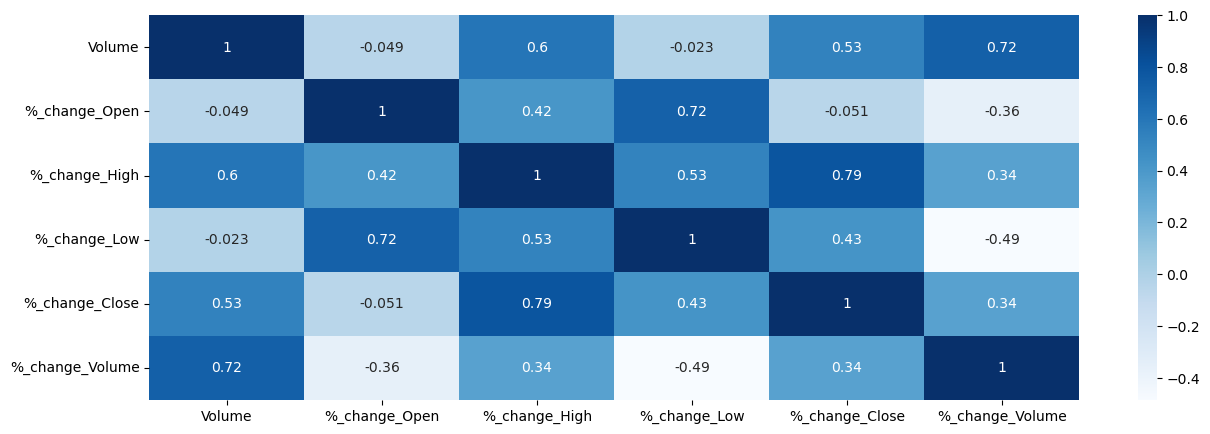

In [8]:
eda_stock_data = eda_stock_data.drop(['Open','High','Low', 'Adj Close', 
                                      'shifted_Open', 'shifted_High', 'shifted_Low', 'shifted_Close',
                                     'shifted_Volume', 'values_change_Open', 'values_change_High', 
                                      'values_change_Low', 'values_change_Close', 'values_change_Volume'],axis=1)
plt.figure(figsize=(15,5))
sns.heatmap(eda_stock_data.corr(),cmap='Blues',annot=True)

The main variable we are going to focus on in this dataset is the ‘Volume’. Variables having a large correlation value with volume represent that those numbers might have intrigued a large number of buyers and sellers. Correlation between those features and the volume feature will tell us how a change in that feature impacts the number of stocks traded that day.

The %_change_Volume shows the most positive correlation with the volume feature. This means that the greater the difference between the volume of the stock today and the volume of the stock price of yesterday, the greater will be the stocks traded that day. As there is no information about the number of buyers and sellers, we can only guess that a high difference in volume might attract more buyers. Whereas a fewer difference may attract more sellers.

## 2.3 Exploratory Data Analysis on Tweets

In [9]:
tweets_data = pd.read_csv('/Users/user/Documents/Springboard_Data_Science/Capstone_2_Twitter_Sentiment_Analysis/Data/tweets_data.csv', lineterminator='\n')

In [10]:
tweets_data.head()

,Dates,Time,user,likes,source,text,Subjectivity,Polarity,Analysis
0,2022-10-30,23:59:36,Keanu5004,0,Twitter Web App,free stock trading discord:https://t.co/txystf...,0.800000,0.4,Positive
1,2022-10-30,23:59:22,5ccollective,0,Twitter for iPhone,@aravosis @elonmusk @unilever @apple @cocacola...,0.285714,0.0,Neutral
2,2022-10-30,23:59:18,optionsful,0,Twitter Web App,$rblx nice move last week. now watch for some ...,0.388889,0.2,Positive
3,2022-10-30,23:58:58,Keanu5004,0,Twitter Web App,📌discord https://t.co/txystf24p2\n\nbest stock...,0.150000,0.5,Positive
4,2022-10-30,23:58:28,jongovi,0,Twitter for iPhone,@markhertling + we need to pressure the behemo...,0.000000,0.0,Neutral


In [11]:
tweets_data[tweets_data.isna().any(axis=1)]

,Dates,Time,user,likes,source,text,Subjectivity,Polarity,Analysis


In [12]:
tweets_data.dropna(inplace=True)

### 2.3.1 Plot the Word Cloud

Now to actually understand the content of the tweets which people tweet, we need to know the most common types of words used in these tweets. To do so, we will have to create a Word Cloud of the top most words used in the tweets. We will make the word clouds based on the text.

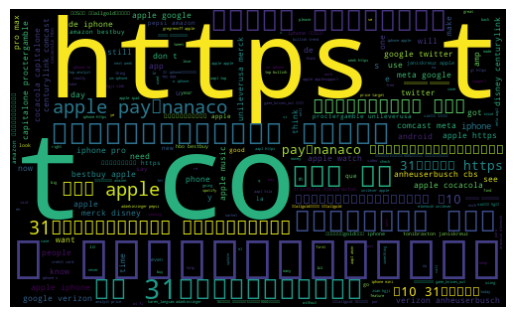

In [13]:
#We want to look at the common words for all tweets
from wordcloud import WordCloud
allWords = ' '.join([twts for twts in tweets_data['text']])
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=119).generate(allWords)

plt.imshow(wordCloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### 2.3.2 Subseting tweets

Now that we have imported the whole tweet dataset, we will be subsetting the tweets data into weekly increments. From there, we will create a function to filter out tweets that were produced during trading-hours, and tweets that were produced during after-hour. This will allow us to use the trading-hours tweets to predict closing price, and use after-hour tweets to predict opening price.

From the first notebook, we know that the tweets were scraped using UTC timezone \
We will create two separate dataframes: 
1. tweets that were produced during trading-hours (1:30:00 PM UTC - 8:30:00 PM UTC)
2. tweets that were produced during after-hour (8:30:00 PM PST - 1:30:00 PM PST)

In [14]:
tweets_data.Time.unique()

array(['23:59:36', '23:59:22', '23:59:18', ..., '19:05:19', '19:05:17',
       '19:05:16'], dtype=object)

In [15]:
#Subseting tweets that were produced during trading-hours & after-hour:
trading_hours = (tweets_data['Time'] >= '13:30:00') & (tweets_data['Time'] < '20:30:00')
after_hours = (tweets_data['Time'] >= '20:30:00') & (tweets_data['Time'] < '13:30:00')

trading_hours_tweets = tweets_data.loc[trading_hours]
after_hours_tweets = tweets_data.loc[after_hours]

In [16]:
#Viewing the tail to see if it starts at 13:30:00pm UTC
trading_hours_tweets.tail()

,Dates,Time,user,likes,source,text,Subjectivity,Polarity,Analysis
29998,2022-10-30,19:05:20,mirehmet,1,Twitter Web App,apple: chinese workers flee covid lockdown at ...,0.000000,0.000000,Neutral
29999,2022-10-30,19:05:19,lorrrrdddeeeess,0,Twitter for Android,se hace la mili y tiene puras fotos de iphone ...,0.000000,0.000000,Neutral
30000,2022-10-30,19:05:18,RosalieTheNerd,0,Twitter for iPhone,@apple hey what’s up with your phones huh? it ...,0.192593,-0.103704,Negative
30001,2022-10-30,19:05:17,kaoconnor,3,Twitter for iPhone,stankmeister stinky loves to lick my iphone. ...,0.666667,-0.700000,Negative
30002,2022-10-30,19:05:16,Angelajordison,0,Twitter for iPhone,@allenkessler @luukseproblemen @wsop @wsopcom ...,0.000000,0.000000,Neutral


In [17]:
#Inspecting the end time 
trading_hours_tweets.head()

,Dates,Time,user,likes,source,text,Subjectivity,Polarity,Analysis
1023,2022-10-30,20:29:52,nicrae45,0,Twitter for iPhone,@tristkiss @tonibraxton @janiskreuz @apple @go...,0.700,0.800,Positive
1024,2022-10-30,20:29:00,0x1585D65F0,1,Twitter for iPhone,@im4ch3t3 @ctc_syco @apple @applesupport hehe ...,0.000,0.000,Neutral
1025,2022-10-30,20:28:34,equitydd,1,Twitter for iPhone,@archna2011 @barchart this is $aapl trend line...,0.325,0.325,Positive
1026,2022-10-30,20:28:31,THESMARR,0,Twitter Web App,@apple can y’all give @nickiminaj her own pi...,0.650,0.250,Positive
1027,2022-10-30,20:28:26,_Idontknowbro_,0,Twitter for iPhone,@apple ios16 is messing with my phone service ...,0.600,0.200,Positive


In [18]:
#Inspecting tweets during after-hours
after_hours_tweets.head()

,Dates,Time,user,likes,source,text,Subjectivity,Polarity,Analysis


In [19]:
type(trading_hours_tweets)

pandas.core.frame.DataFrame

Looks like our function only queried tweets that were posted during trading hours  

### 2.3.3 Trading Hours Tweets

In [20]:
len(trading_hours_tweets.text)

6857

In [21]:
#Get the percentage of positive tweets during trading hours
ptweets_trading_hours = trading_hours_tweets[trading_hours_tweets.Analysis == 'Positive']
ptweets_trading_hours = ptweets_trading_hours['text']

round(len(ptweets_trading_hours)/len(trading_hours_tweets['text'])*100, 2)

34.61

In [22]:
#Get the percentage of negative tweets during trading hours
ntweets_trading_hours = trading_hours_tweets[trading_hours_tweets.Analysis == 'Negative']
ntweets_trading_hours = ntweets_trading_hours['text']

round(len(ntweets_trading_hours)/len(trading_hours_tweets['text'])*100, 2)

12.34

In [23]:
#Get the percentage of neutral tweets during trading hours
neutraltweets_trading_hours = trading_hours_tweets[trading_hours_tweets.Analysis == 'Neutral']
neutraltweets_trading_hours = neutraltweets_trading_hours['text']

round(len(neutraltweets_trading_hours)/len(trading_hours_tweets['text'])*100, 2)

53.06

<AxesSubplot:title={'center':'Sentiment Analysis during Trading Hours'}, xlabel='Sentiment', ylabel='Counts'>

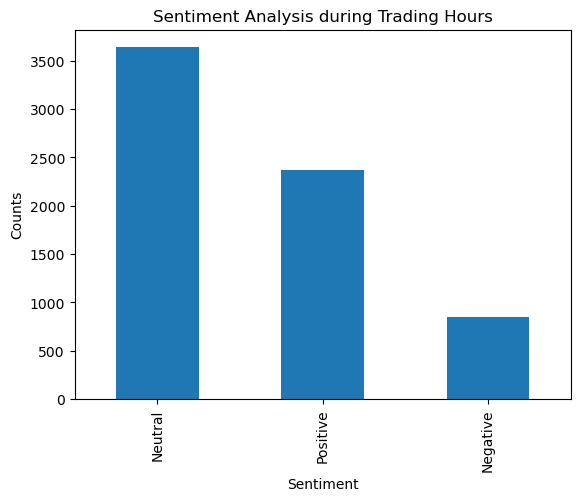

In [24]:
#Show the value counts
trading_hours_tweets['Analysis'].value_counts()

#plot and visualize the counts
plt.title('Sentiment Analysis during Trading Hours')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
trading_hours_tweets['Analysis'].value_counts().plot(kind='bar')

### 2.3.4 Frequency

Now we want to visualize most frequent tweeter in October 2022

In [25]:
def plot_frequency_charts(df, feature, title, pallete):
    freq_df = pd.DataFrame()
    freq_df[feature] = df[feature]
    
    f, ax = plt.subplots(1,1, figsize=(16,4))
    total = float(len(df))
    g = sns.countplot(df[feature], order = df[feature].value_counts().index[:20], palette=pallete)
    g.set_title("Number and percentage of {}".format(title))

    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.2f}%'.format(100*height/total),
                ha="center") 

    plt.title('Frequency of {} tweeting in October 2022'.format(feature))
    plt.ylabel('Frequency', fontsize=12)
    plt.xlabel(title, fontsize=12)
    plt.xticks(rotation=90)
    plt.show()

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


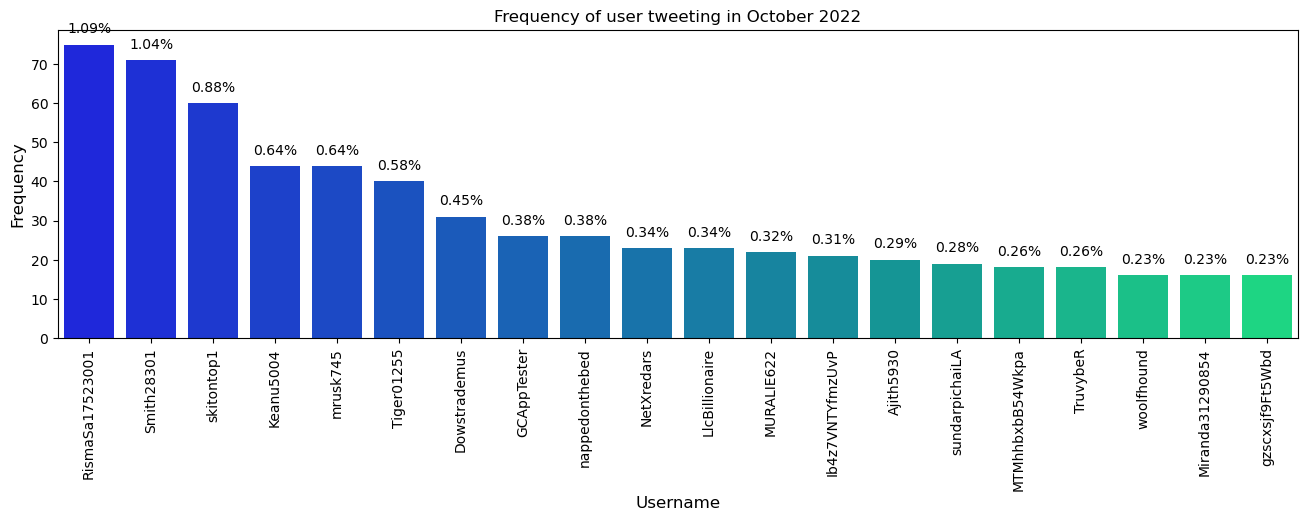

In [26]:
plot_frequency_charts(trading_hours_tweets, 'user', 'Username', 'winter')

We also want to visualize what date users were the most active on Twitter

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


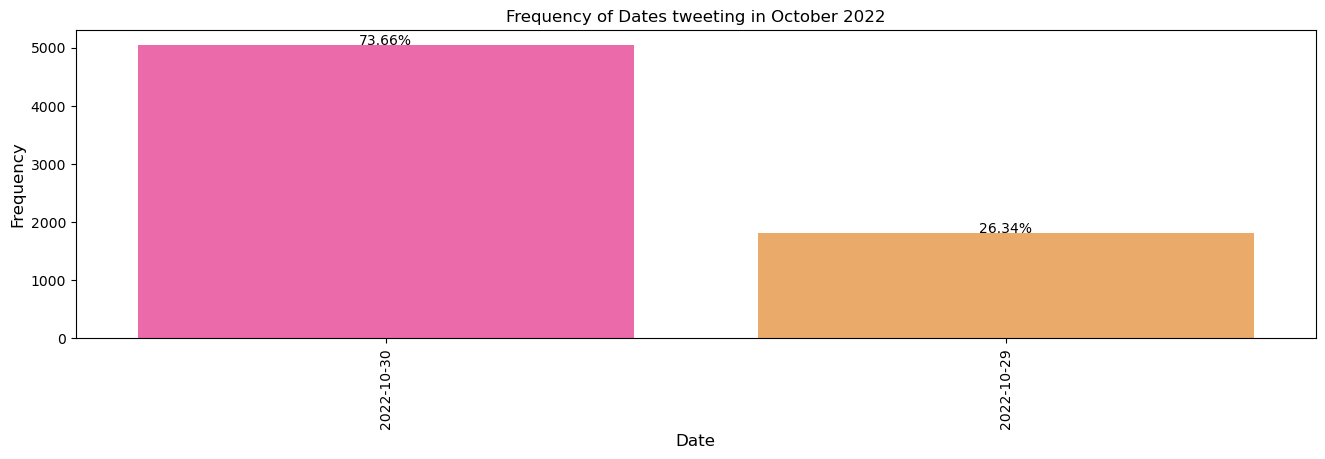

In [27]:
plot_frequency_charts(trading_hours_tweets, 'Dates', 'Date', 'spring')

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


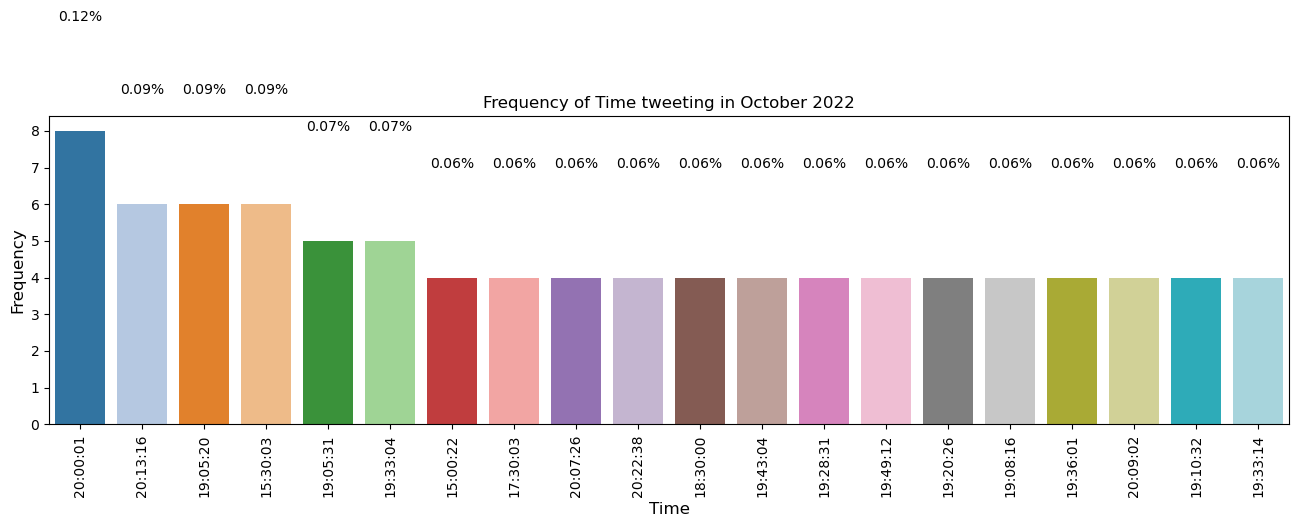

In [28]:
plot_frequency_charts(trading_hours_tweets, 'Time', 'Time', 'tab20')

The most "popular" time of tweet should also be visualized. Just a reminder that we're looking at UTC time, so 13:30pm UTC is 5:30am PST and 8:30am EST

What is the most common number of likes in a tweet in October 2022?

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


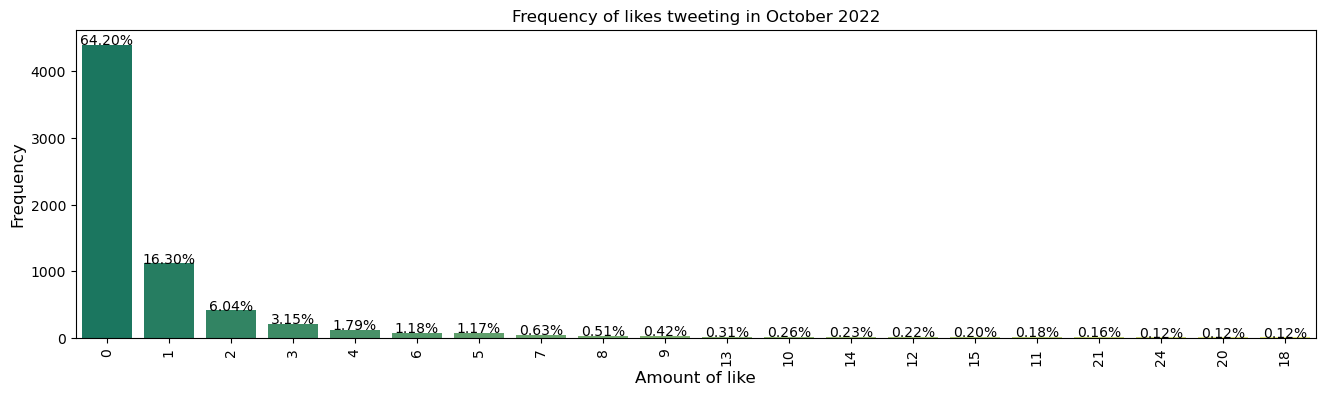

In [29]:
plot_frequency_charts(trading_hours_tweets, 'likes', 'Amount of like', 'summer')

What devices were the users using to post these tweets?

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12362 (\N{HIRAGANA LETTER O}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 24471 (\N{CJK UNIFIED IDEOGRAPH-5F97}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12398 (\N{HIRAGANA LETTER NO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: 

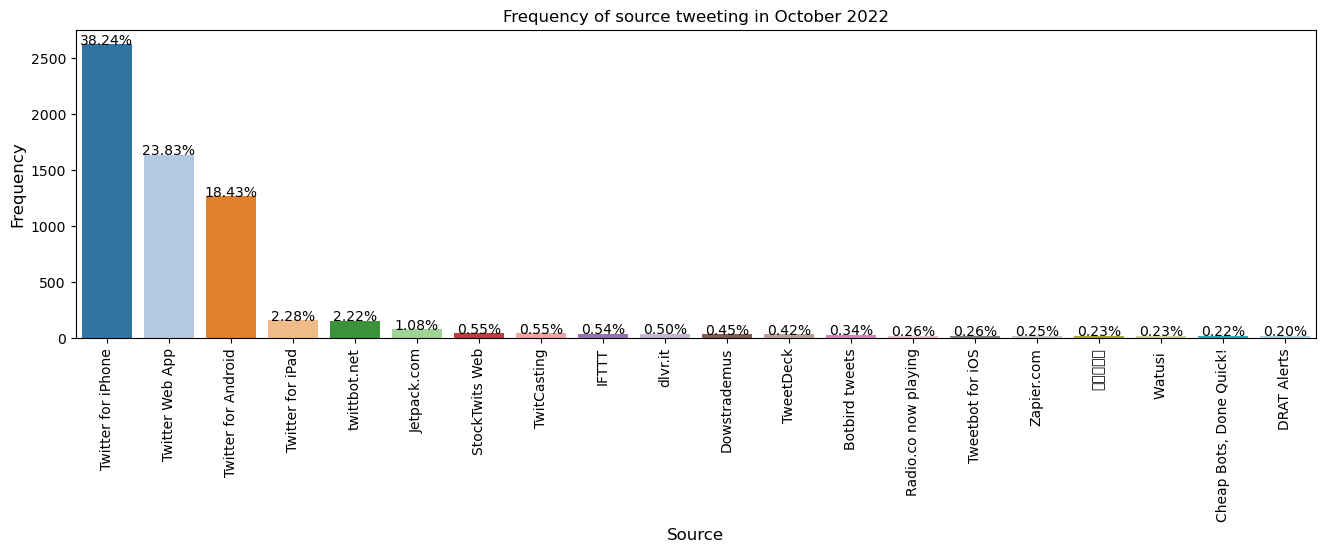

In [30]:
plot_frequency_charts(trading_hours_tweets, 'source', 'Source', 'tab20')

## Saving

In [31]:
eda_stock_data.to_csv('/Users/user/Documents/Springboard_Data_Science/Capstone_2_Twitter_Sentiment_Analysis/Data/eda_stock_data.csv', index=False)
trading_hours_tweets.to_csv('/Users/user/Documents/Springboard_Data_Science/Capstone_2_Twitter_Sentiment_Analysis/Data/trading_hours_tweets.csv', index=False)